In [1]:
# Deliverable 2 Mission_to_Mars

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import matplotlib as plt
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager

In [4]:
# Set up Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [5]:
# Visit the Mars Facts site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [6]:
html = browser.html
html_soup = soup(html, 'html.parser')

In [14]:
table = html_soup.find('table', class_='table')

In [17]:
df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')
df

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [18]:
mars_data_df = df[0]
mars_data_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [23]:
mars_data_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [30]:
mars_data_df["terrestrial_date"] = pd.to_datetime(mars_data_df["terrestrial_date"])

In [31]:
mars_data_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [32]:
# How many months exist on Mars?
months_on_mars = mars_data_df['month'].nunique()
print(f'There are', months_on_mars,'months on Mars.')

There are 12 months on Mars.


In [39]:
# How many Martian (and not Earth) days worth of data exist in the scraped dataset?

mars_day_1 = mars_data_df['sol'].min()
mars_last_day = mars_data_df['sol'].max()
unique_days = mars_data_df['sol'].nunique()

print(f'There is', unique_days ,'Martine days worth of data existing in the mars dataset starting from', mars_day_1, 'days to', mars_last_day, 'days')


There is 1867 Martine days worth of data existing in the mars dataset starting from 10 days to 1977 days


In [48]:
# What are the coldest and the warmest months on Mars (at the location of Curiosity)? Get the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart.
avg_min_temp=[]

for x in range(1, months_on_mars+1):
    weather_per_month = {"month":"","avg_min_temp":""}
    avg_min_temp_month = mars_data_df.loc[mars_data_df['month']==x]['min_temp'].mean()
    round_min_temp_month = round(avg_min_temp_month,0)
    weather_per_month["month"] = x
    weather_per_month["avg_min_temp"] = round_min_temp_month
    avg_min_temp.append(weather_per_month)    

print(avg_min_temp)      

[{'month': 1, 'avg_min_temp': -77.0}, {'month': 2, 'avg_min_temp': -80.0}, {'month': 3, 'avg_min_temp': -83.0}, {'month': 4, 'avg_min_temp': -83.0}, {'month': 5, 'avg_min_temp': -79.0}, {'month': 6, 'avg_min_temp': -75.0}, {'month': 7, 'avg_min_temp': -72.0}, {'month': 8, 'avg_min_temp': -68.0}, {'month': 9, 'avg_min_temp': -69.0}, {'month': 10, 'avg_min_temp': -72.0}, {'month': 11, 'avg_min_temp': -72.0}, {'month': 12, 'avg_min_temp': -74.0}]


In [68]:
new_df = pd.DataFrame(avg_min_temp)
print(new_df)

    month  avg_min_temp
0       1         -77.0
1       2         -80.0
2       3         -83.0
3       4         -83.0
4       5         -79.0
5       6         -75.0
6       7         -72.0
7       8         -68.0
8       9         -69.0
9      10         -72.0
10     11         -72.0
11     12         -74.0


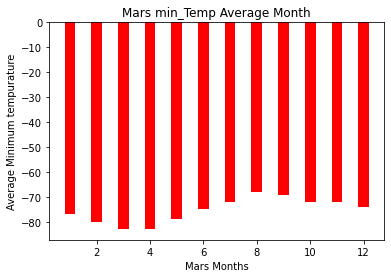

In [70]:
import numpy as np
import matplotlib.pyplot as plt
# creating the bar plot
plt.bar(new_df['month'], new_df['avg_min_temp'], color ='red',
        width = 0.4)
 
plt.xlabel("Mars Months")
plt.ylabel("Average Minimum tempurature")
plt.title("Mars min_Temp Average Month")
plt.show()

In [55]:
# The coldest month 
min_avg_temp = new_df['avg_min_temp'].min()
month_min_temp = new_df.loc[new_df['avg_min_temp']==min_avg_temp]
month_min_temp

,month,avg_min_temp
2,3,-83.0
3,4,-83.0


In [56]:
max_avg_temp = new_df['avg_min_temp'].max()
month_max_temp = new_df.loc[new_df['avg_min_temp']==max_avg_temp]
month_max_temp

,month,avg_min_temp
7,8,-68.0


In [77]:
# Which months have the lowest and the highest atmospheric pressure on Mars? Get the answer by averaging the daily atmospheric pressure of all the months. Plot the results as a bar chart.
# Grouping DataFrame by the average of pressure for each month
new_df=mars_data_df.groupby('month')
pressure_df=new_df.mean().loc[:,['pressure']]
pressure_df

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


In [78]:
# The month with the lowest atmospheric pressure  
min_avg_pressure= pressure_df['pressure'].min()
min_pressure_month=pressure_df.loc[pressure_df['pressure']==min_avg_pressure]
min_pressure_month

,pressure
month,
6,745.054422


In [79]:
# The month with the highest atmospheric pressure  
max_avg_pressure= pressure_df['pressure'].max()
max_pressure_month=pressure_df.loc[pressure_df['pressure']==max_avg_pressure]
max_pressure_month

,pressure
month,
9,913.30597


Text(0.5, 1.0, 'Average Atmosphere Pressure')

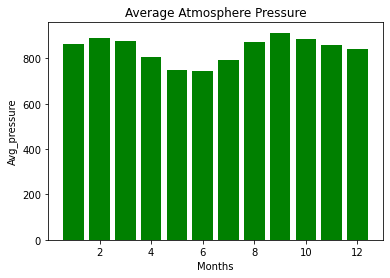

In [80]:
# Plot the results as a bar chart
i=range(1,13)
plt.bar(i, pressure_df['pressure'], color='green')

# Create labels for the plot

plt.xlabel("Months")
plt.ylabel("Avg_pressure")

# Create title
plt.title('Average Atmosphere Pressure')

In [88]:
long=mars_data_df['ls'].loc[0]
long

155

In [89]:
mars_long=mars_data_df.loc[mars_data_df['ls']==long]
mars_long

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
598,621,2014-07-03,678,155,6,-77.0,739.0
599,624,2014-07-04,679,155,6,-77.0,738.0
1249,1274,2016-05-20,1346,155,6,-75.0,737.0
1250,1277,2016-05-21,1347,155,6,-75.0,736.0


In [90]:
# About how many terrestrial (Earth) days exist in a Martian year? That is, in the time that Mars circles the Sun once, how many days elapse on Earth? Visually estimate the result by plotting the daily minimum temperature.
import datetime as dt

y=mars_long['terrestrial_date'].loc[0]
date_after_one_martian_year = mars_long['terrestrial_date'].iloc[1]
martial_year= date_after_one_martian_year-y
print(f'In one Martial year, nearly ',martial_year,'pass on Earth')

In one Martial year, nearly  686 days 00:00:00 pass on Earth


Text(0.5, 1.0, 'Daily minimum temperature')

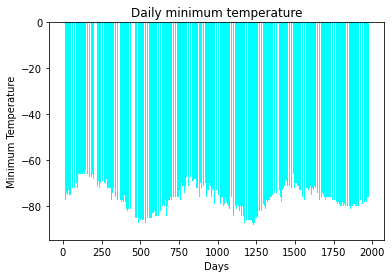

In [95]:
#  Visually estimate the result by plotting the daily minimum temperature
plt.bar(mars_data_df['sol'],mars_data_df['min_temp'], color = "cyan")

# Create labels for the x and y axes.
plt.xlabel("Days")
plt.ylabel("Minimum Temperature")

# Create title 
plt.title('Daily minimum temperature')

In [96]:
# Export the DataFrame to a CSV file
mars_data_df.to_csv('mars_table.csv',index=False)